In [1]:
import pandas as pd 
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold
#from sklearn.preprocessing import n_estimators
import matplotlib.pyplot as plt 

import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
hr = pd.read_csv("D:\\codes\\Datasets\\Cases\\human-resources-analytics\\HR_comma_sep.csv")
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']



dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']



In [5]:
gra=GradientBoostingClassifier(random_state=23)
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)


In [6]:
import numpy as np

In [ ]:

params={'n_estimators':[25,50,75],'learning_rate':np.linspace(0.001,0.7,5),'max_depth':[None,2,3,5]}

gcv = GridSearchCV(gra, param_grid=params,cv=kfold, scoring='neg_log_loss',verbose=3,n_jobs=-1)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [ ]:
bm_rf=gcv.best_estimator_
df_imp=pd.DataFrame({'Features':list(X.columns),'Importance':bm_rf.feature_importances_})
df_imp=df_imp[df_imp['Importance']>0].sort_values('Importance')

plt.barh(df_imp['Features'],df_imp['Importance'])
plt.title('Tree')
plt.show()

In [ ]:
boston=pd.read_csv("D:\\codes\\Datasets\\Cases\\Boston Housing\\Boston.csv")
X=boston.drop(['medv'],axis=1)
y=boston['medv']

from sklearn.ensemble import GradientBoostingRegressor
ada=GradientBoostingRegressor(random_state=23)
kfold=KFold(n_splits=5,shuffle=True,random_state=23)

params={'n_estimators':[25,50,75],'learning_rate':np.linspace(0.001,0.7,5),'max_depth':[None,2,3,5]}

gcv = GridSearchCV(ada, param_grid=params,cv=kfold, scoring='r2',n_jobs=-1)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)
bm_rf=gcv.best_estimator_

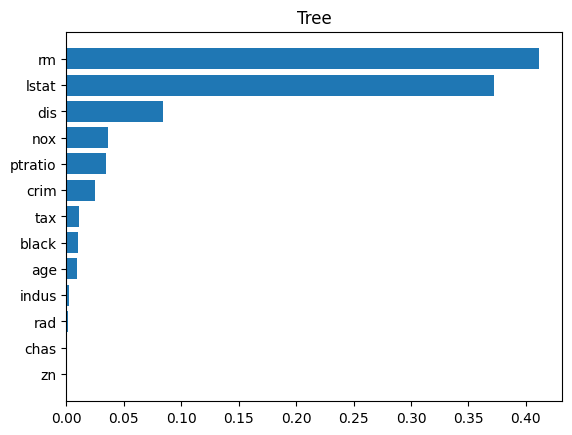

In [3]:
df_imp=pd.DataFrame({'Features':list(X.columns),'Importance':bm_rf.feature_importances_})
df_imp=df_imp[df_imp['Importance']>0].sort_values('Importance')

plt.barh(df_imp['Features'],df_imp['Importance'])
plt.title('Tree')
plt.show()
